## 双均线策略实例

![title](./img/2.png)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv',index_col=0,parse_dates=True)

In [3]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


### 分别计算短期和长期均线

- 1.选择苹果股价数据并去掉缺失值
- 2.计算短期与长期均线
- 3.标记短期与长期均线位置关系

In [6]:
data = data[['AAPL.O']].dropna()
data.head()

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827


#### 设置短期和长期均线

In [7]:
SMA1 = 42
SMA2 = 252

In [8]:
data['SMA1'] = data.rolling(SMA1).mean()
data['SMA2'] = data[['AAPL.O']].rolling(SMA2).mean()

In [11]:
data.tail(10)

,AAPL.O,SMA1,SMA2
Date,,,
2018-06-18,188.74,183.358810,167.489325
2018-06-19,185.69,183.665714,167.645476
2018-06-20,186.50,184.160476,167.810119
2018-06-21,185.46,184.641905,167.967222
2018-06-22,184.92,185.165238,168.123135
2018-06-25,182.17,185.606190,168.265556
2018-06-26,184.43,186.087381,168.418770
2018-06-27,184.16,186.607381,168.579206
2018-06-28,185.50,187.089286,168.736627


<Axes: xlabel='Date'>

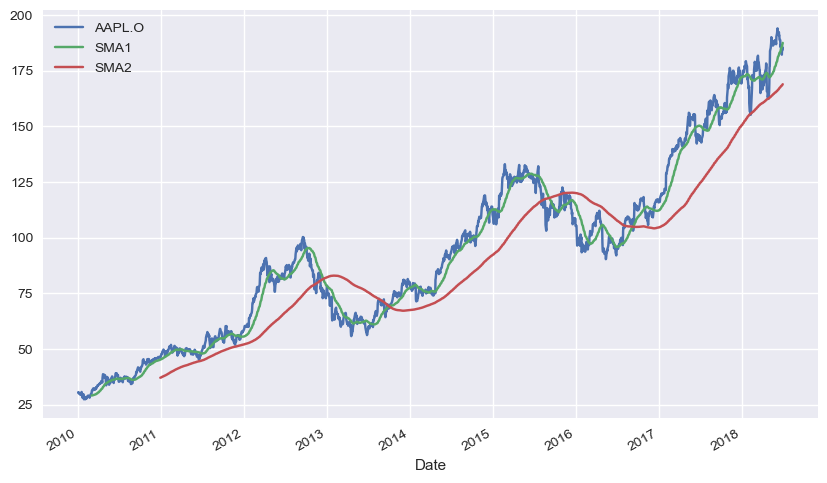

In [12]:
data.plot(figsize=(10,6))

#### 计算买入、持有区间和卖出、做空区间

In [14]:
data.dropna(inplace=True)
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data.head(10)

,AAPL.O,SMA1,SMA2,Position
Date,,,,
2010-12-31,46.079954,45.280967,37.120735,1
2011-01-03,47.081381,45.349708,37.186246,1
2011-01-04,47.327096,45.412599,37.252521,1
2011-01-05,47.714238,45.466102,37.322266,1
2011-01-06,47.675667,45.522565,37.392079,1
2011-01-07,48.017095,45.582089,37.462453,1
2011-01-10,48.922094,45.671800,37.537478,1
2011-01-11,48.805665,45.752106,37.613397,1
2011-01-12,49.202808,45.846544,37.689230,1


<Axes: xlabel='Date'>

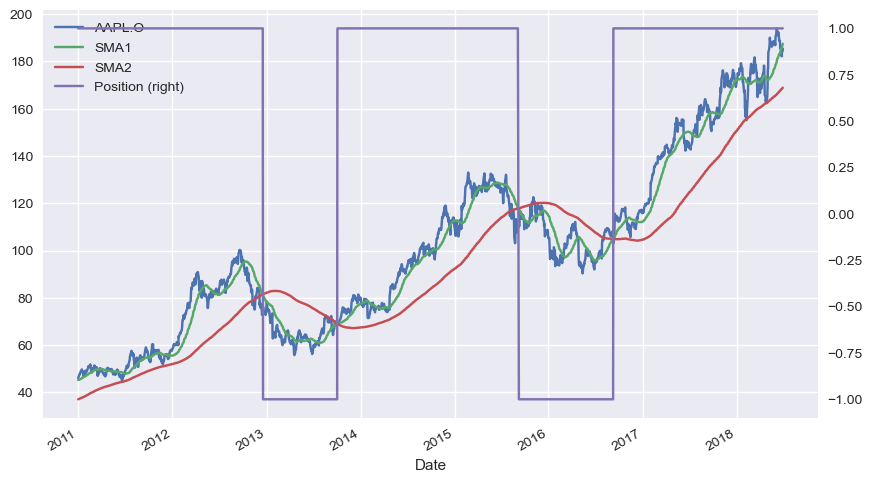

In [15]:
data.plot(figsize=(10,6),secondary_y='Position')

### 策略实施
- 分别计算无策略和均线策略时的报酬率

1. 求出对数收益率

In [18]:
data['Reward'] = np.log(data['AAPL.O'] / data['AAPL.O'].shift(1))
data.head(10)

,AAPL.O,SMA1,SMA2,Position,Reward
Date,,,,,
2010-12-31,46.079954,45.280967,37.120735,1,NaN
2011-01-03,47.081381,45.349708,37.186246,1,0.021500
2011-01-04,47.327096,45.412599,37.252521,1,0.005205
2011-01-05,47.714238,45.466102,37.322266,1,0.008147
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809
2011-01-07,48.017095,45.582089,37.462453,1,0.007136
2011-01-10,48.922094,45.671800,37.537478,1,0.018672
2011-01-11,48.805665,45.752106,37.613397,1,-0.002383
2011-01-12,49.202808,45.846544,37.689230,1,0.008104


2. 建立策略：根据前一天（shift(1))持有的情况进行第二天的收益计算

In [19]:
data['Strategy'] = data['Position'].shift(1)*data['Reward']

3. 计算总收益，恢复对数收益率为原始收益率

In [21]:
np.exp(data[['Reward','Strategy']].sum())

Reward      4.017148
Strategy    5.811299
dtype: float64

这段代码是在执行一个基于移动平均线交叉策略的金融数据分析。让我们逐步解析这段代码：

### 移动平均线设置

1. **SMA1 和 SMA2**: 这里定义了两个简单移动平均线（SMA）的窗口大小。`SMA1 = 42` 和 `SMA2 = 252` 分别可能代表短期和长期的移动平均。这些数字在股市分析中常见，可能代表42个交易日（大约两个月）和252个交易日（大约一年）的时间范围。

2. **计算移动平均线**:
   - `data['SMA1'] = data.rolling(SMA1).mean()`: 计算42日移动平均线。
   - `data['SMA2'] = data[['AAPL.O']].rolling(SMA2).mean()`: 计算252日移动平均线，专门针对 `'AAPL.O'` 列（苹果公司的股价）。

### 交易策略

3. **定义交易位置**:
   - `data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)`: 这行代码创建了一个新列 `Position`，用于表示交易策略的位置。当42日移动平均线（SMA1）高于252日移动平均线（SMA2）时，假定市场趋势为上升，设置为 1（代表买入或持有股票的位置）。反之，如果SMA1低于SMA2，假定市场趋势为下降，设置为 -1（代表卖出或做空的位置）。

### 计算收益

4. **计算对数收益率**:
   - `data['Reward'] = np.log(data['AAPL.O'] / data['AAPL.O'].shift(1))`: 这行代码计算了苹果股票的日对数收益率。

5. **策略收益计算**:
   - `data['Strategy'] = data['Position'].shift(1) * data['Reward']`: 这里计算的是基于上述交易策略的收益。通过将前一天的 `Position` （交易位置）与当前天的 `Reward` （对数收益率）相乘，得到的是策略的日收益。将 `Position` 向前移动一天（使用 `shift(1)`）是因为交易决策是基于前一天的信息做出的，而收益或损失则体现在接下来的一天。

### 总收益

6. **计算总收益**:
   - `np.exp(data[['Reward','Strategy']].sum())`: 这行代码计算了策略和股票本身的累积收益。首先，通过 `sum()` 对每日收益进行累加，然后使用 `np.exp()` 将对数收益率转换回普通收益率。这样得到的值表示从策略开始到现在的总收益倍数。

总结来说，这段代码通过比较短期和长期移动平均线来制定交易策略，并计算了这种策略下的对数收益率以及策略的整体效果。这是金融市场分析中常用的技术分析方法之一，用于预测市场趋势和制定交易决策。

### 短期与长期均线选择多少天合适呢？
- 遍历不同短期与长期数值

In [59]:
data = pd.read_csv('data.csv',index_col=0,parse_dates=True)
data = data[['AAPL.O']].dropna()
data.head()

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827


In [162]:
from itertools import product
sma1 = range(20, 61, 4)
sma2 = range(180,281, 10)
# SMA1 = 30
# SMA2 = 240

- itertools.product会遍历sma1,sma2中的所有值，简单来说，它可以创建一个迭代器，该迭代器会产生所有可能的元组组合，这些元组由输入迭代器中的元素组成。这对于需要遍历多个序列所有可能组合的情况非常有用

In [178]:
results = pd.DataFrame()
for SMA1,SMA2 in product(sma1,sma2):
    # 求取每一组数据的收益率，在不同的均线策略下
    df = pd.DataFrame(data['AAPL.O'])
    df.dropna(inplace=True)
    # 对数收益率
    df['Returns'] = np.log(df['AAPL.O']/df['AAPL.O'].shift(1))
    df['SMA1'] = df['AAPL.O'].rolling(SMA1).mean()
    df['SMA2'] = df['AAPL.O'].rolling(SMA2).mean()
    df.dropna(inplace=True)
    df['Position'] = np.where(df['SMA1'] > df['SMA2'],1,-1)
    df['Strategy'] = df['Position'].shift(1)*df['Returns']
    df.dropna(inplace=True)
    perf = np.exp(df[['Returns','Strategy']].sum())
    newRow=pd.DataFrame([{'Name':f'{SMA1}_{SMA2}','SMA1':SMA1,'SMA2':SMA2,'Returns':perf['Returns'],'Strategy':perf['Strategy'],'Out':perf['Strategy']-perf['Returns']}])
    newRow = newRow.set_index('Name')
    results = pd.concat([results,newRow])
#     newRow.head()


In [179]:
results.head(121)

,SMA1,SMA2,Returns,Strategy,Out
Name,,,,,
20_180,20,180,4.574979,4.326431,-0.248548
20_190,20,190,4.650342,5.218921,0.568579
20_200,20,200,4.074753,5.300207,1.225454
20_210,20,210,4.259883,5.219410,0.959527
20_220,20,220,4.220272,5.259889,1.039616
...,...,...,...,...,...
60_240,60,240,4.045619,4.675603,0.629984
60_250,60,250,3.983434,4.583305,0.599871
60_260,60,260,3.762184,4.138318,0.376134


<Axes: xlabel='Name'>

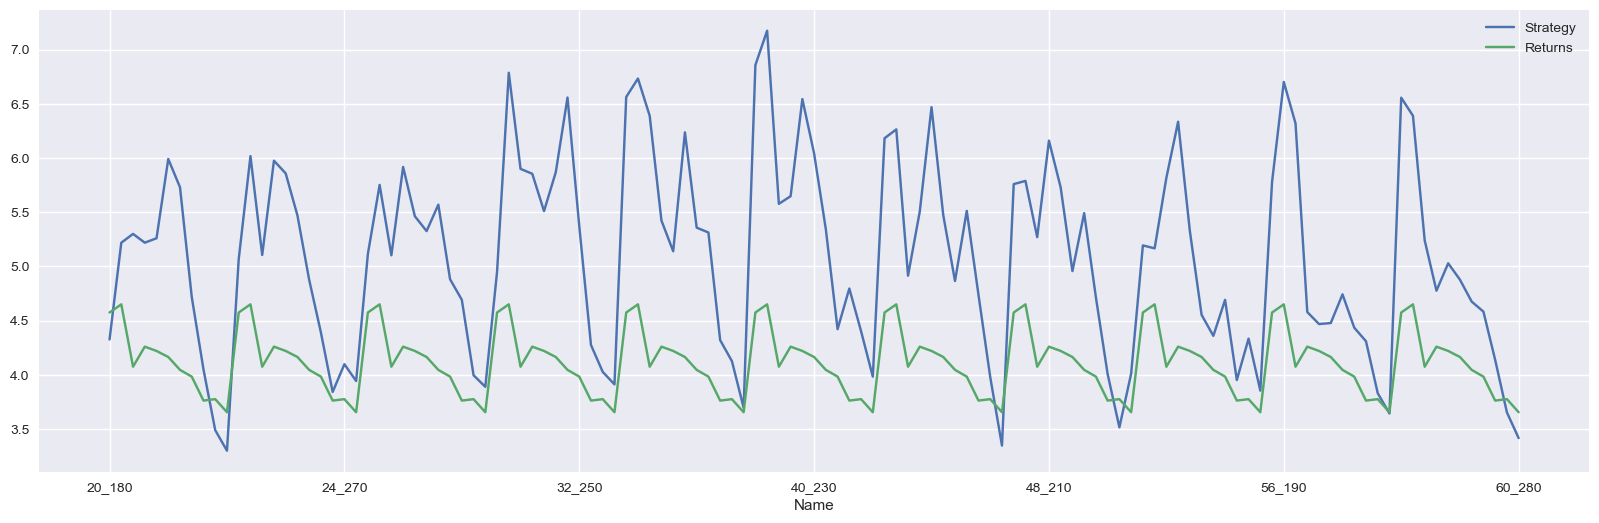

In [183]:
results[['Strategy', 'Returns']].plot(figsize=(20,6))